In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

file = '..\data\external\Legally_Operating_Businesses.csv'
df = pd.read_csv(file)

In [6]:
# There are around 270,000 entries

print(df.shape)

(273590, 27)


In [7]:
print(df.dtypes)

DCA License Number                object
License Type                      object
License Expiration Date           object
License Status                    object
License Creation Date             object
Industry                          object
Business Name                     object
Business Name 2                   object
Address Building                  object
Address Street Name               object
Secondary Address Street Name     object
Address City                      object
Address State                     object
Address ZIP                       object
Contact Phone Number              object
Address Borough                   object
Borough Code                     float64
Community Board                  float64
Council District                 float64
BIN                               object
BBL                               object
NTA                               object
Census Tract                     float64
Detail                            object
Longitude       

In [8]:
# We only want the entries that have their exact location listed
# and are located within NYC.

df = df[df['Latitude'].isna() == False]
df = df[df['Business Name'].isna()==False]
df = df[df['Address State']=='NY']
df.reset_index(drop = True, inplace = True)
df.shape

(169054, 27)

In [9]:
# There are around 4,000 entries with the expiration date missing

df.isna().sum()

DCA License Number                    0
License Type                          0
License Expiration Date            4144
License Status                        0
License Creation Date                 0
Industry                              0
Business Name                         0
Business Name 2                  121608
Address Building                    825
Address Street Name                   0
Secondary Address Street Name    166958
Address City                         12
Address State                         0
Address ZIP                          20
Contact Phone Number               6212
Address Borough                    1006
Borough Code                       4512
Community Board                    8219
Council District                   7743
BIN                                9665
BBL                                9665
NTA                               32376
Census Tract                      32376
Detail                           140881
Longitude                             0


In [10]:
# Convert the creation and expiration dates to date time format

df['License Creation Date'] = pd.to_datetime(df['License Creation Date'], format = '%m/%d/%Y')
df['License Expiration Date'] = pd.to_datetime(df['License Expiration Date'], format = '%m/%d/%Y')

In [11]:
# Convert the 'License Status' column to either a 1 (Active) or 0 (Inactive)

df['License Status'] = df['License Status']=='Active'
df['License Status'] = df['License Status'].astype('int')

In [12]:
# Drop the columns which we will not need in our analysis
drop_cols = ['DCA License Number', 'License Type', 'Business Name', 'Business Name 2', 'Address Building', 'Address Street Name', 'Secondary Address Street Name', 'Address City', 'Address State', 'Address ZIP', 'Contact Phone Number', 'Address Borough','Borough Code','Community Board','Council District','BIN','BBL','NTA','Census Tract','Detail','Location']
df.drop(labels = drop_cols, axis=1, inplace = True)

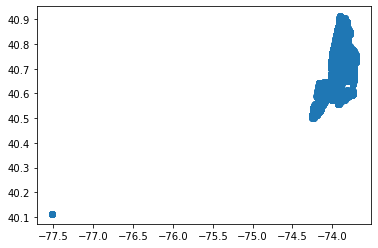

In [13]:
# Plot based on the longitude and latitude

plt.scatter(df['Longitude'],df['Latitude'])
plt.show()

In [14]:
# Seems like there are some outliers, we investigate them

df[df['Longitude'] < -76]['Longitude'].value_counts()

-77.519584    7519
-77.519855       2
-77.519854       2
-77.519854       1
-77.519854       1
-77.519854       1
-77.519854       1
-77.519854       1
-77.519854       1
Name: Longitude, dtype: int64

In [15]:
# For some reason there are over 7,000 businesses with this exact same location 
# This represents less than 5% of the data so we conclude that we may drop these entries
df = df[df['Longitude'] > -76]
df.reset_index(drop = True, inplace = True)

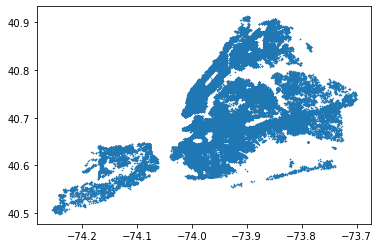

In [16]:
# Improved plot, you can see the shape of NYC, including Central Park, where there are no businesses!

plt.scatter(df['Longitude'],df['Latitude'], s=0.25)
plt.show()

In [24]:
# Some data plots to test whether the dates issued for license creation are reasonable
# They are decently uniformly distributed after for each month and day, though there are some irregularities

df['Year-Month'] = df['License Creation Date'].apply(lambda x: str(x)[:7])

<AxesSubplot:xlabel='Year-Month'>

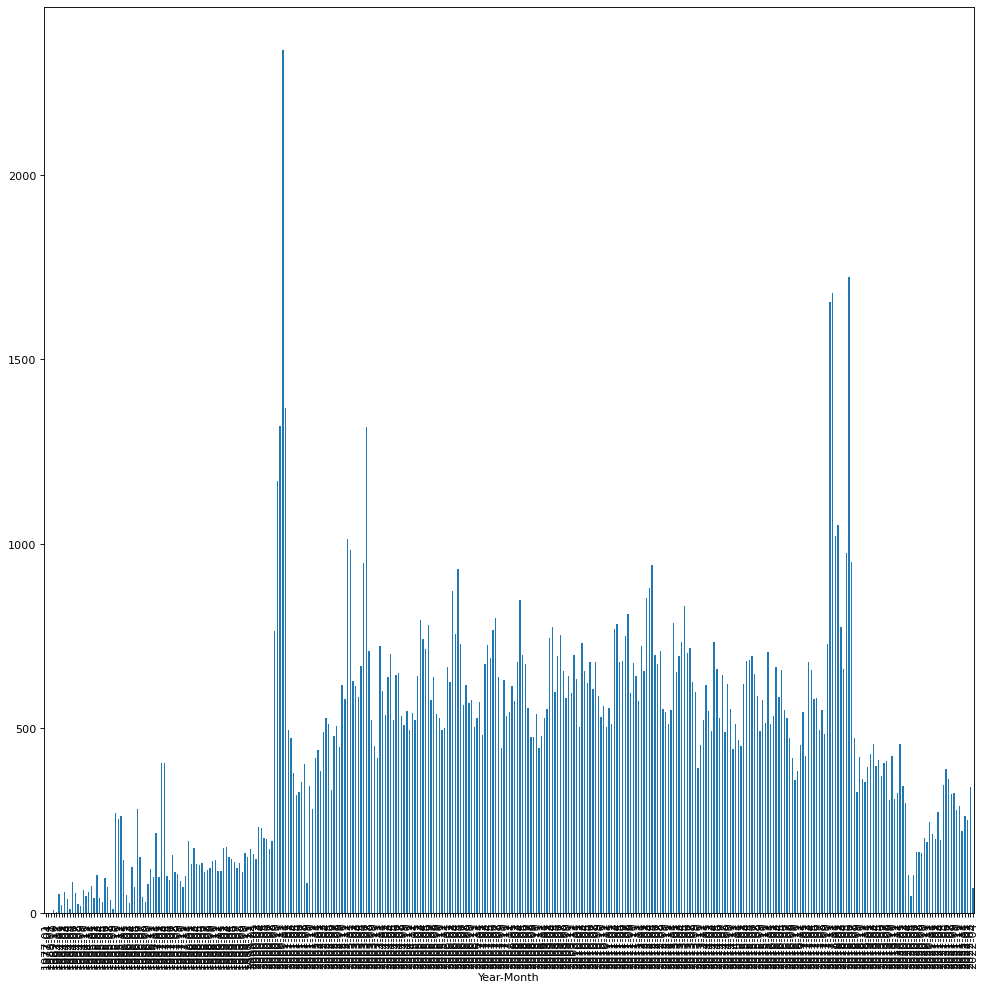

In [31]:
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)

df.groupby('Year-Month')['License Creation Date'].count().plot(kind='bar')